# EDA de Electric and Alternative Fuel Charging Station

## Importamos las librerias necesarias

In [190]:
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import linregress


## Cargamos el archivo a analizar

In [91]:
df = pd.read_csv(".\Datasets_clean\Electric_and_Alternative_Fuel_Charging_Stations.csv")

### Revisión del dataset

In [92]:
# Mostrar información general sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           70406 non-null  object 
 1   Station Name             70406 non-null  object 
 2   Street Address           70405 non-null  object 
 3   City                     70406 non-null  object 
 4   State                    70406 non-null  object 
 5   ZIP                      70405 non-null  object 
 6   Station Phone            65204 non-null  object 
 7   Status Code              70406 non-null  object 
 8   Groups With Access Code  70406 non-null  object 
 9   Access Days Time         66628 non-null  object 
 10  EV Level2 EVSE Num       54144 non-null  float64
 11  EV Network               60907 non-null  object 
 12  EV Network Web           50305 non-null  object 
 13  Geocode Status           70391 non-null  object 
 14  Latitude              

In [85]:
df.sample(3)

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,...,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country,Access Code
30181,ELEC,Union College - 50 Yard Line Lot,1261 Lenox Rd,Schenectady,NY,12308,866-816-7584,E,Public,24 hours daily,...,GPS,42.816642,-73.924801,2021-05-06,156046,2021-12-06 18:36:15 UTC,2020-05-01,J1772,US,public
69384,ELEC,BEAVERTON CNTRL GRIFFITH #1,4755 SW Griffith Dr,Beaverton,OR,97005,888-758-4389,E,Public,24 hours daily,...,GPS,45.485592,-122.798089,2022-07-25,222555,2022-07-25 01:28:07 UTC,2022-07-07,J1772,US,public
29188,ELEC,CPU EC 2,1200 Fort Vancouver Way Southside Public Park,Vancouver,WA,98663,888-758-4389,E,Public,24 hours daily,...,GPS,45.629460,-122.663366,2022-07-25,154099,2022-07-25 01:05:23 UTC,2020-02-27,J1772,US,public


In [86]:
# Visualizamos las columnas que no se incluyen en la visualización anterior
columnas = ['EV Level2 EVSE Num', 'EV Network', 'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude']
print(df[columnas].sample(3))

       EV Level2 EVSE Num         EV Network  \
2749                  1.0      Non-Networked   
35157                 NaN  Electrify America   
36851                 2.0      Non-Networked   

                          EV Network Web Geocode Status   Latitude   Longitude  
2749                                 NaN          200-9  32.802475 -117.215269  
35157  https://www.electrifyamerica.com/            GPS  37.753967 -122.488667  
36851                                NaN            GPS  34.221087 -118.451275  


Es posible convertir algunas columnas a otro formato de variable para facilitar los análisis estadísticos al formato int:
- ZIP 
- Station Phone
- EV Level2 EVSE Num
- ID   

In [103]:
# Se genera una copia del df original
df2 = df.copy()

In [88]:
columnas_int = ['ZIP', 'Station Phone', 'EV Level2 EVSE Num', 'ID']

for column in columnas_int:
    valores_unicos = df2[column].unique()
    print(f"Valores únicos en la columna '{column}': {valores_unicos}")

Valores únicos en la columna 'ZIP': ['36107' '30303' '30324' ... 'H2Z 1A4' '07732' 'V9A 2A3']
Valores únicos en la columna 'Station Phone': [nan '770-350-3000' '479-783-3188' ... '512-930-6150' '512-228-3428'
 '204-704-5000']
Valores únicos en la columna 'EV Level2 EVSE Num': [ nan  39.   4.  12. 311.  19.  10.   2.  46.  13.   3.   1.  16.  20.
   6.   5.   8.  21.  67.  56.  17.   7.   9.  14.  26.  24.  11.  18.
  32.  44.  51.  38.  28. 156. 123.  40.  25.  37.  41.  30.  15. 100.
  42.  34.  22. 108.  60.  70.  27.  48.  50.  52.  23.  31. 106.  66.
  29.  36. 128.  73.  49.  81.  91.  62.]
Valores únicos en la columna 'ID': [    17     42     45 ... 224380 224381 224382]


La columna 'ZIP' contiene valores numericos y alfanuméricos por lo que no es posible trasformarla a int. 
Los valores de 'Station Phone' contienen un separador, por otro lado se considera por el momento innecesario transformar dichos valores.

In [104]:
# Revisamos los Nan en las columnas seleccionadas
cuenta_nan = df2[columnas_int].isnull().sum()
print("Cantidad de NaN en cada columna:")
print(cuenta_nan)

Cantidad de NaN en cada columna:
ZIP                       1
Station Phone          5202
EV Level2 EVSE Num    16262
ID                        0
dtype: int64


In [105]:
columnas_int2 = ['EV Level2 EVSE Num', 'ID']

# Reemplazar NaN con 0 en las columnas seleccionadas
df2[columnas_int2] = df2[columnas_int2].fillna(0)

# Convertir las columnas a tipo int
df2[columnas_int2] = df2[columnas_int2].astype(int)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   City                              70406 non-null  object 
 4   State                             70406 non-null  object 
 5   ZIP                               70405 non-null  object 
 6   Station Phone                     65204 non-null  object 
 7   Status Code                       70406 non-null  object 
 8   Groups With Access Code           70406 non-null  object 
 9   Access Days Time                  66628 non-null  object 
 10  EV Level2 EVSE Num                70406 non-null  int32  
 11  EV Network                        60907 non-null  object 
 12  EV N

Podria ser de interés evaluar la conversión a formato de fecha las columnas 'Date Last Confirmed', 'Open Date'

In [106]:
columnas_date = ['Date Last Confirmed', 'Open Date']

In [107]:
cuenta_nan = df2[columnas_date].isnull().sum()
print("Cantidad de NaN en cada columna:")
print(cuenta_nan)

Cantidad de NaN en cada columna:
Date Last Confirmed     218
Open Date              1096
dtype: int64


In [108]:
df2[columnas_date] = df2[columnas_date].fillna(0)

In [109]:
# Convertir las columnas de fecha a formato de fecha
date_columns = ['Date Last Confirmed', 'Open Date']
df2[date_columns] = df2[date_columns].apply(pd.to_datetime, errors='coerce')

In [112]:
# Es posible crear las columnas separadas para el año y el mes de "Date Last Confirmed"
df2['Year Date Last Confirmed'] = df2['Date Last Confirmed'].dt.year.fillna(0).astype(int)
df2['Month Date Last Confirmed'] = df2['Date Last Confirmed'].dt.month.fillna(0).astype(int)

In [113]:
# De forma análoga para el año y el mes de "Open Date"
df2['Year Open Date'] = df2['Open Date'].dt.year.fillna(0).astype(int)
df2['Month Open Date'] = df2['Open Date'].dt.month.fillna(0).astype(int)

In [114]:
# Revisamos el df a analizar
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fuel Type Code             70406 non-null  object        
 1   Station Name               70406 non-null  object        
 2   Street Address             70405 non-null  object        
 3   City                       70406 non-null  object        
 4   State                      70406 non-null  object        
 5   ZIP                        70405 non-null  object        
 6   Station Phone              65204 non-null  object        
 7   Status Code                70406 non-null  object        
 8   Groups With Access Code    70406 non-null  object        
 9   Access Days Time           66628 non-null  object        
 10  EV Level2 EVSE Num         70406 non-null  int32         
 11  EV Network                 60907 non-null  object        
 12  EV N

### Análisis de variables numéricas

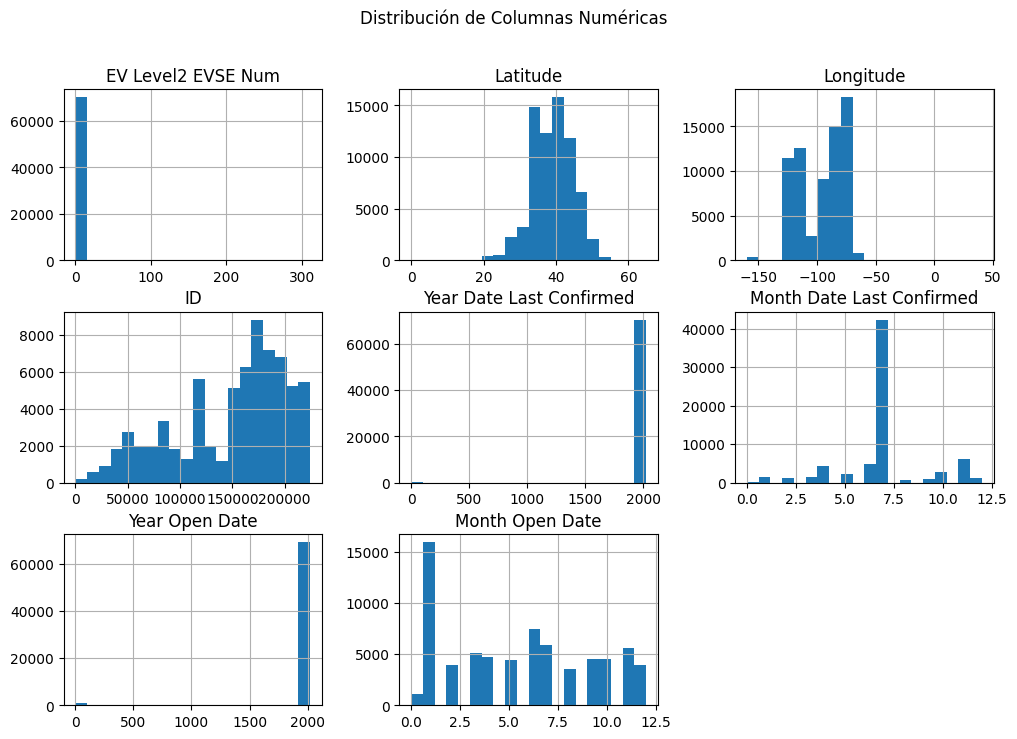

In [122]:
# Seleccionamos las columnas a visualizar
columnas_numericas = ['EV Level2 EVSE Num', 'Latitude', 'Longitude', 'ID',
                   'Year Date Last Confirmed', 'Month Date Last Confirmed',
                   'Year Open Date', 'Month Open Date']

# Visualizar histogramas para columnas numéricas
df2[columnas_numericas].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribución de Columnas Numéricas")
plt.show()

### Revisión de las variables

- **EV Level2 EVSE Num:**

Representaría la cantidad de estaciones de carga de vehículos eléctricos (EVSE) de nivel 2 en cada ubicación. Las estaciones de carga de nivel 2 son un tipo de infraestructura de carga para vehículos eléctricos que proporciona una carga más rápida que las estaciones de nivel 1, ya que generalmente operan a voltajes más altos.

Esta variable indicaría la cantidad de puntos de carga de nivel 2 disponibles en cada estación o ubicación, lo que podría ser relevante para analizar la disponibilidad y capacidad de carga de vehículos eléctricos en diferentes lugares.

In [141]:
unique_counts = df2['EV Level2 EVSE Num'].value_counts()
print(unique_counts)
# Nos indica que la mayoria de los lugares poseen pocos puntos de carga de nivel 2

EV Level2 EVSE Num
2      33310
0      16262
1      13105
4       2978
3       2053
       ...  
311        1
37         1
41         1
46         1
62         1
Name: count, Length: 64, dtype: int64


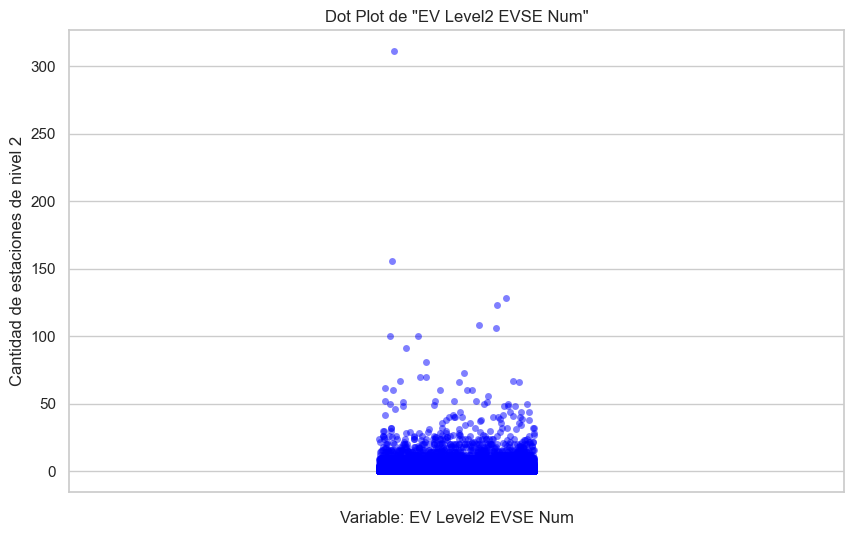

In [215]:
# Se profundiza en el análisis de la variable "EV Level2 EVSE Num"
plt.figure(figsize=(10, 6))
sns.stripplot(data=df2, y='EV Level2 EVSE Num', jitter=True, color='blue', alpha=0.5)
plt.title('Dot Plot de "EV Level2 EVSE Num"')
plt.ylabel('Cantidad de estaciones de nivel 2')
plt.xlabel('Variable: EV Level2 EVSE Num')
plt.show()

In [170]:
# Obtener los 10 valores más altos correspondientes a "EV Level2 EVSE Num"
valores_mayores = df2.nlargest(10, 'EV Level2 EVSE Num')
print(tabulate(valores_mayores, headers='keys', tablefmt='pretty'))


+-------+----------------+-----------------------------------------------------+------------------------+----------------+-------+-------+----------------------------+-------------+-------------------------+------------------------------------------------------------------------------------+--------------------+-------------------+--------------------------------------------+----------------+------------------+-------------------+---------------------+--------+-------------------------+---------------------+--------------------------+---------+-------------+--------------------------+---------------------------+----------------+-----------------+
|       | Fuel Type Code |                    Station Name                     |     Street Address     |      City      | State |  ZIP  |       Station Phone        | Status Code | Groups With Access Code |                                  Access Days Time                                  | EV Level2 EVSE Num |    EV Network     |            

Podemos notar que los 10 puntos con mayor cantidad de puntos de carga son en general lugares privados, correspondientes a empresas que brindan ese servicio a sus empleados. 

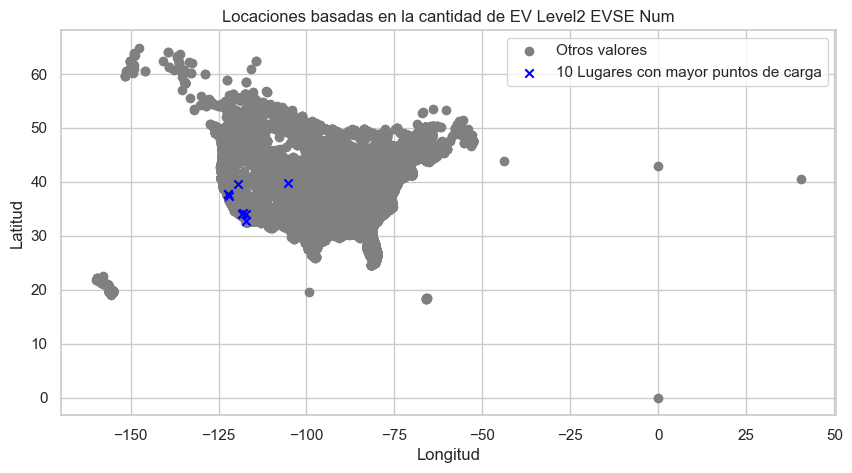

In [174]:
# Obtener las 10 filas con los valores más altos
valores_mas_altos = df2.nlargest(10, 'EV Level2 EVSE Num')

# Extraer las coordenadas de latitud y longitud
latitudes_top = valores_mas_altos['Latitude']
longitudes_top = valores_mas_altos['Longitude']

# Filtrar los valores que no están en el top 10
otros_valores = df2[~df2.index.isin(valores_mas_altos.index)]
latitudes_other = otros_valores['Latitude']
longitudes_other = otros_valores['Longitude']

# Graficar las coordenadas en un scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(longitudes_other, latitudes_other, color='grey', marker='o', label='Otros valores')
plt.scatter(longitudes_top, latitudes_top, color='blue', marker='x', label='10 Lugares con mayor puntos de carga')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Locaciones basadas en la cantidad de EV Level2 EVSE Num')
plt.legend()
plt.grid(True)
plt.show()



Estos lugares se encuentran al suroeste de Estados Unidos. 

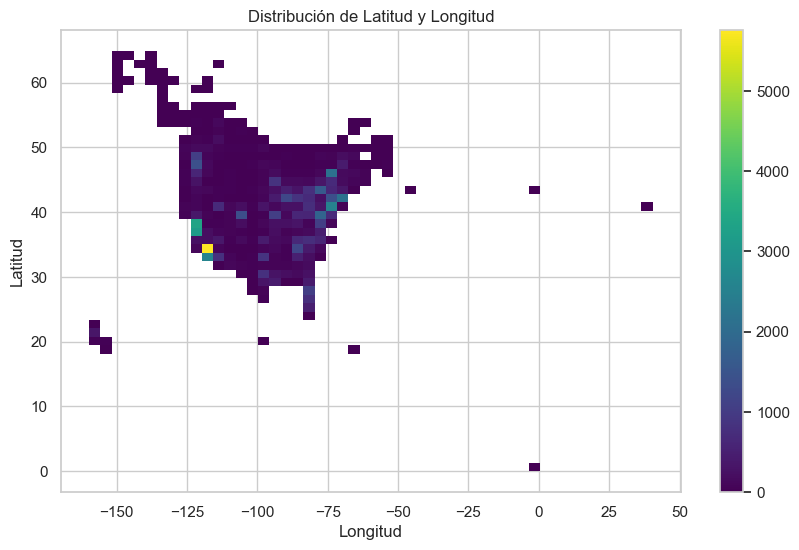

In [235]:
# Histograma y KDE (Kernel Density Estimate) de Latitude vs. Longitude:

plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Longitude', y='Latitude', bins=50, cmap='viridis', cbar=True)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de Latitud y Longitud')
plt.grid(True)
plt.show()

Aunque de manera más amplia podemos notar que los puntos con mayor cantidad de estaciones están sobre las costas del país. 

- **Year Open Date:**

Esta variable se obtiene desde los datos de "Open date" y expresa el año registrado de apertura de cada estación de carga.  

In [176]:
# Revisamos la cantidad de estaciones que se inauguraron en los años registrados
year_counts = df2['Year Open Date'].value_counts()
print(year_counts)


Year Open Date
2021    22048
2020    10170
2022     8792
2019     7026
2018     3864
2017     3048
2016     2944
2015     2778
2012     1984
2014     1589
2011     1325
2013     1148
0        1096
2009      329
2000      316
2010      305
2008      304
2007      262
2006      216
2005      157
1999      146
2003      111
1996       88
2002       69
2004       65
2001       49
1998       38
1997       38
1995       25
1993       12
1987       12
1992       11
1994       10
1991        9
1989        5
1990        4
1988        4
1985        2
1980        2
1986        1
1974        1
1984        1
1983        1
1978        1
Name: count, dtype: int64


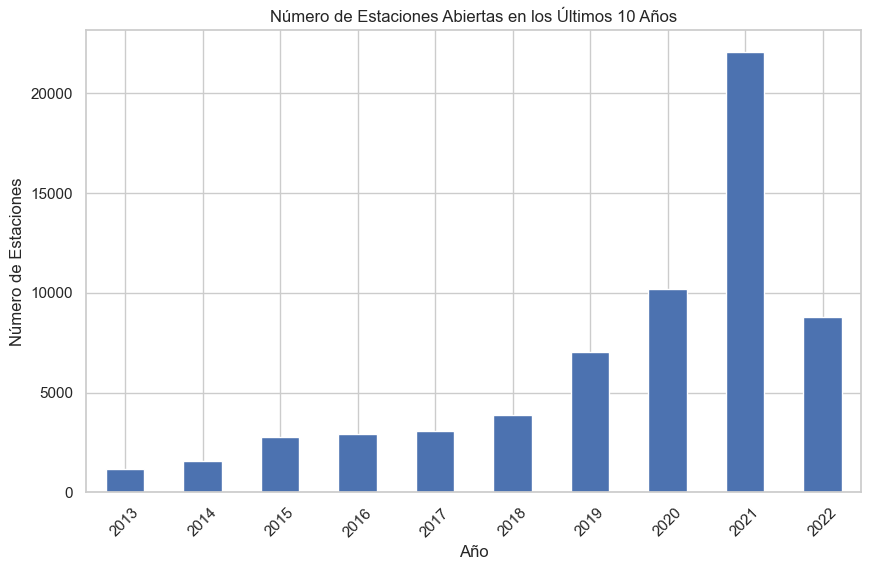

In [185]:
# Se realiza el conteo de estaciones por año
cuenta_anio = df2['Year Open Date'].value_counts()

# Ordenar los valores por año de manera creciente
cuenta_anio = cuenta_anio.sort_index()

# Seleccionar los últimos 10 años
ultimos_10_anios = cuenta_anio.index[-10:]
ultimos_10_anios = cuenta_anio[ultimos_10_anios]

# Gráfico de barras
plt.figure(figsize=(10, 6))
ultimos_10_anios.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Número de Estaciones')
plt.title('Número de Estaciones Abiertas en los Últimos 10 Años')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Podemos notar que hubo un incremento de la cantidad de estaciones en estos últimos años, con un incremento importante en el año 2021.

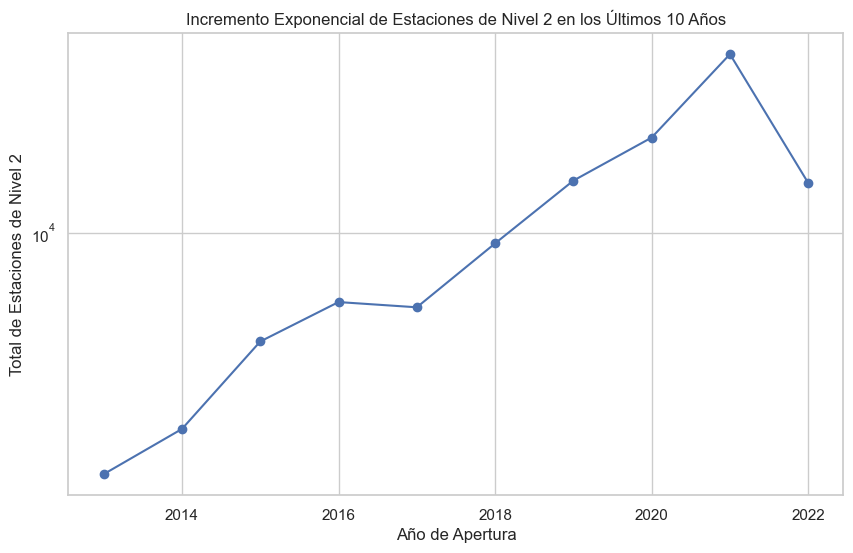

In [189]:
# Filtramos las estaciones de nivel 2
estaciones = df2[df2['EV Level2 EVSE Num'] > 0]

# Seleccionamos los últimos 10 años
ultimos_anios = df2['Year Open Date'].max() - 9
datos_seleccionados = estaciones[estaciones['Year Open Date'] >= ultimos_anios]

# Calculamos el total de estaciones por año
cuenta_anual = datos_seleccionados.groupby('Year Open Date')['EV Level2 EVSE Num'].sum()

# Crear un gráfico de línea con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.plot(cuenta_anual.index, cuenta_anual.values, marker='o')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Año de Apertura')
plt.ylabel('Total de Estaciones de Nivel 2')
plt.title('Incremento Exponencial de Estaciones de Nivel 2 en los Últimos 10 Años')
plt.grid(True)
plt.show()



In [191]:
# Revisamos estadísticamente este crecimiento
# Datos de años y totales de estaciones
anios = cuenta_anual.index
totales = cuenta_anual.values

# Aplicar logaritmo natural a los totales (para linealizar la relación)
log_totales = np.log(totales)

# Calcular el coeficiente de regresión exponencial
slope, intercept, r_value, p_value, std_err = linregress(anios, log_totales)

# Mostrar el coeficiente de regresión exponencial (r_value)
print(f"Coeficiente de Regresión Exponencial (r): {r_value}")


Coeficiente de Regresión Exponencial (r): 0.9367666520118212


El valor de r = 0.9367 sugiere que hay una relación exponencial positiva bastante fuerte entre los años y el número de estaciones. 
El descenso de los valores del año 2022 puede corresponder a que los datos no se encuentran actualizados o que existe un descenso efectivo de instalación de puntos de carga. 

### Análisis de variables categóricas

In [124]:
# Obtener los valores únicos en las columnas categóricas
categorical_columns = ['Fuel Type Code', 'Status Code', 'Groups With Access Code',
                       'EV Network', 'Geocode Status', 'Country', 'Access Code']
categorical_unique = {col: df2[col].unique() for col in categorical_columns}
print("\nValores únicos en columnas categóricas:")
for col, unique_values in categorical_unique.items():
    print(f"{col}: {unique_values}")



Valores únicos en columnas categóricas:
Fuel Type Code: ['CNG' 'E85' 'ELEC' 'LNG' 'LPG' 'BD' 'HY']
Status Code: ['E' 'T' 'P']
Groups With Access Code: ['Private' 'Public - Card key at all times' 'Private - Government only'
 'Public - Credit card at all times' 'TEMPORARILY UNAVAILABLE (Public)'
 'TEMPORARILY UNAVAILABLE (Public - Credit card at all times)'
 'Private - Fleet customers only' 'Public'
 'Public - Credit card after hours' 'TEMPORARILY UNAVAILABLE (Private)'
 'Private - Card key at all times' 'Public - Call ahead'
 'Public - Card key after hours'
 'TEMPORARILY UNAVAILABLE (Public - Credit card after hours)'
 'TEMPORARILY UNAVAILABLE (Public - Call ahead)'
 'TEMPORARILY UNAVAILABLE (Private - Government only)'
 'PLANNED - not yet accessible (Public - Credit card at all times)'
 'PLANNED - not yet accessible (Private - Government only)'
 'Public - Limited hours' 'PLANNED - not yet accessible (Public)'
 'PLANNED - not yet accessible (Public - Call ahead)'
 'Private - Call ahead

- **Fuel Type Code:**

Representa el tipo de combustible utilizado por estaciones de carga de vehículos eléctricos. Cada código de combustible corresponde a un tipo específico de fuente de energía: 
- CNG: Gas Natural Comprimido
- E85: Mezcla de Etanol y Gasolina
- ELEC: Electricidad
- LNG: Gas Natural Licuado
- LPG: Gas Licuado de Petróleo
- BD: Diésel a base de biomasa
- HY: Hidrógeno

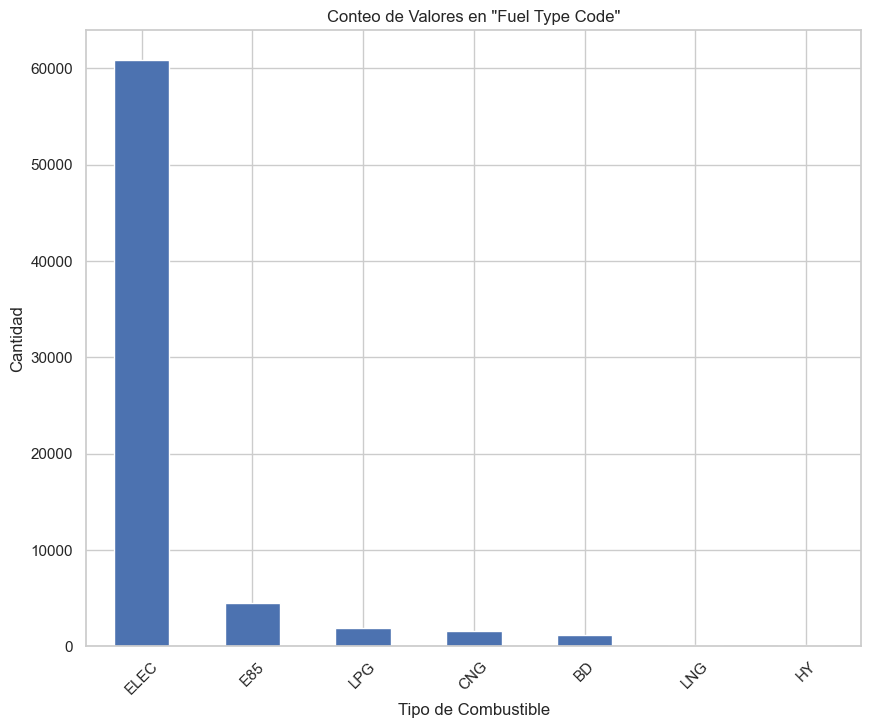

In [196]:
tipo_combustible_counts = df2['Fuel Type Code'].value_counts()

plt.figure(figsize=(10, 8))
tipo_combustible_counts.plot(kind='bar')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.title('Conteo de Valores en "Fuel Type Code"')
plt.xticks(rotation=45)
plt.show()


Podemos notar que en las estaciones evaluadas en este dataset predominan aquellas de fuente eléctrica.  

- **Fuel Type Code:**

Código del tipo de combustible utilizado en la estación: 

- E: Disponible
- P: Planeado
- T: Temporalmente no disponible

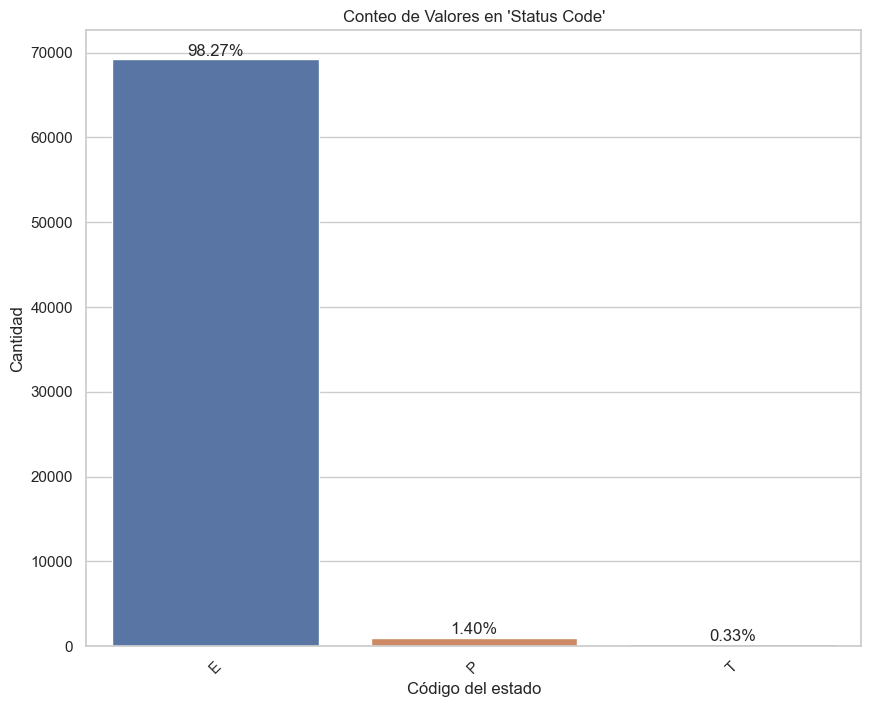

In [201]:
cuenta_estado = df2['Status Code'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=cuenta_estado.index, y=cuenta_estado.values)
plt.xticks(rotation=45)
plt.xlabel("Código del estado")
plt.ylabel("Cantidad")
plt.title("Conteo de Valores en 'Status Code'")

# Agregamos los porcentajes encima de las barras
total = sum(cuenta_estado)
for i, count in enumerate(cuenta_estado.values):
    porcentaje = (count / total) * 100
    plt.text(i, count + 100, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.show()


La mayoría de las estaciones se encuentran disponibles según los registros de este dataset. Mientras que un porcentaje muy pequeño se encuentra planeado o no disponible para su uso. 

- **Groups With Access Code:**

Códigos de acceso para grupos específicos.
Esta variable representaría los diferentes grupos o categorías de acceso a estaciones de carga para vehículos eléctricos. Cada valor en esta columna describe las condiciones o restricciones de acceso a la estación de carga:

- "Private": Estación de carga de acceso privado, posiblemente para uso exclusivo de ciertos usuarios o empresas.
- "Public - Card key at all times": Estación de carga pública que requiere una tarjeta de acceso en todo momento.
- "Private - Government only": Estación de carga privada destinada solo para uso gubernamental.
- "Public - Credit card at all times": Estación de carga pública que acepta pago con tarjeta de crédito en todo momento.
- "TEMPORARILY UNAVAILABLE (Public)": Estación de carga pública temporalmente no disponible.
- "Private - Fleet customers only": Estación de carga privada solo para flotas de vehículos de una empresa.
- "Public": Estación de carga pública sin restricciones de acceso.
- "Public - Credit card after hours": Estación de carga pública que acepta pago con tarjeta de crédito fuera de horas específicas.
- "TEMPORARILY UNAVAILABLE (Private)": Estación de carga privada temporalmente no disponible. 
- "Private - Card key at all times": Estación de carga privada que requiere una tarjeta de acceso en todo momento.
- "Public - Call ahead": Estación de carga pública que requiere que los usuarios llamen con anticipación para acceder.
- "Public - Card key after hours": Estación de carga pública que requiere una tarjeta de acceso fuera de horas específicas.
- "TEMPORARILY UNAVAILABLE (Public - Credit card after hours)": Estación de carga pública temporalmente no disponible fuera de horas específicas.
- "TEMPORARILY UNAVAILABLE (Public - Call ahead)": Estación de carga pública temporalmente no disponible, pero se debe llamar con anticipación.
- "TEMPORARILY UNAVAILABLE (Private - Government only)": Estación de carga privada temporalmente no disponible para uso gubernamental.
- "PLANNED - not yet accessible (Public - Credit card at all times)": Estación de carga pública planificada pero aún no accesible, se requerirá una tarjeta de acceso en todo momento.
- "PLANNED - not yet accessible (Private - Government only)": Estación de carga privada planificada pero aún no accesible, solo para uso gubernamental.
- "Public - Limited hours": Estación de carga pública con horarios limitados.
- "PLANNED - not yet accessible (Public)": Estación de carga pública planificada pero aún no accesible.
- "PLANNED - not yet accessible (Public - Call ahead)": Estación de carga pública planificada pero aún no accesible, se debe llamar con anticipación.
- "Private - Call ahead": Estación de carga privada que requiere una llamada con anticipación para acceder.
- "Private - Credit card at all times": Estación de carga privada que acepta pago con tarjeta de crédito en todo momento.
- "PLANNED - not yet accessible (Private)": Estación de carga privada planificada pero aún no accesible.
- "Public - Fleet customers only": Estación de carga pública solo para clientes de flotas de vehículos.
- "TEMPORARILY UNAVAILABLE (Public - Card key at all times)": Estación de carga pública temporalmente no disponible, requiere tarjeta de acceso en todo momento.
- "Private - Credit card after hours": Estación de carga privada que acepta pago con tarjeta de crédito fuera de horas específicas.
- "Private - Residential": Estación de carga privada destinada para uso residencial.

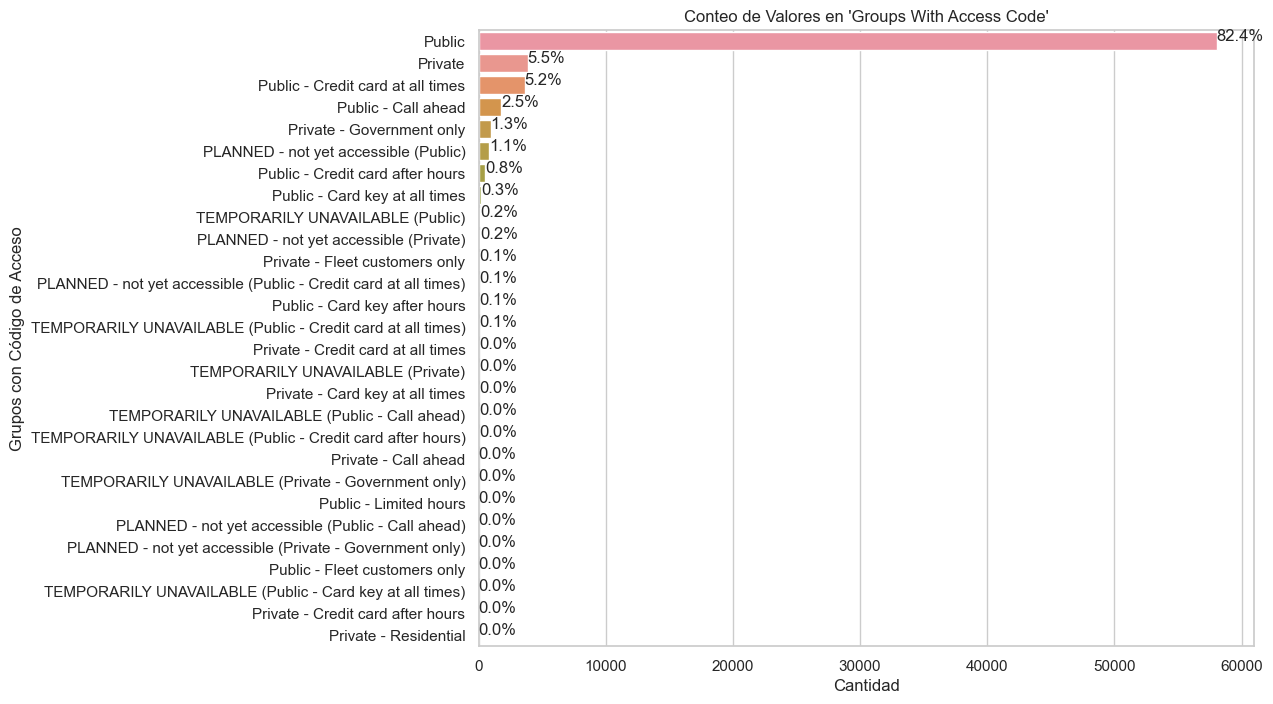

In [206]:
grupos = ['Groups With Access Code']

plt.figure(figsize=(10, 8))
sns.countplot(data=df2, y=grupos[0], order=df2[grupos[0]].value_counts().index)
plt.xlabel("Cantidad")
plt.ylabel("Grupos con Código de Acceso")
plt.title(f"Conteo de Valores en '{grupos[0]}'")

total = len(df2[grupos[0]])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y))

plt.show()


Podemos notar que el 82.4% de los accesos del dataset corresponden a sitios públicos, y aunque aún no hay información sobre muchos puntos, es posible que estos estén considerados en un futuro.  

- **Access Code:**

Lo anterior se puede vincular a la información expresada en esta columna, donde los valores pueden ser públicos o privados. 

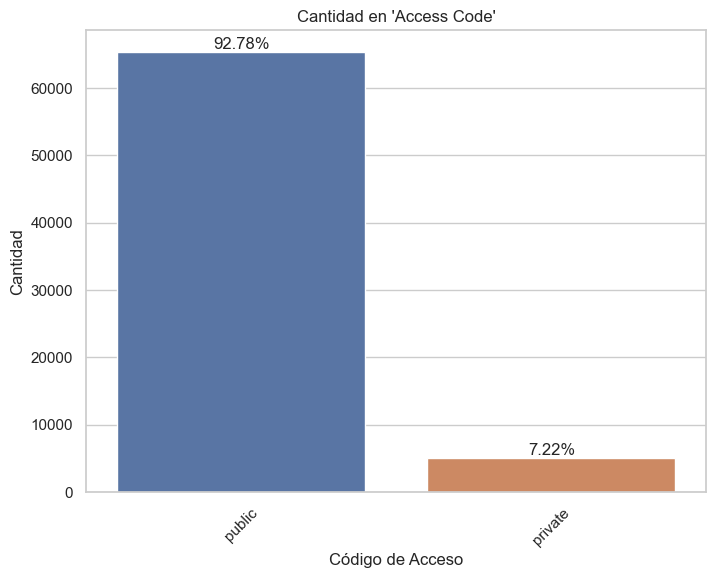

In [226]:
# Calculamos las frecuencias de cada código de acceso
cuenta_acceso = df2['Access Code'].value_counts()

# Calculamos el porcentaje de cada categoría
total_samples = len(df2)
access_code_percentages = (cuenta_acceso / total_samples) * 100

# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cuenta_acceso.index, y=cuenta_acceso.values)
plt.xticks(rotation=45)
plt.xlabel("Código de Acceso")
plt.ylabel("Cantidad")
plt.title("Cantidad en 'Access Code'")

# Agregamos los porcentajes sobre las barras
for i, v in enumerate(cuenta_acceso.values):
    ax.text(i, v + 5, f"{access_code_percentages.iloc[i]:.2f}%", ha='center', va='bottom')

plt.show()



Donde los valores se corresponden a lo previamente analizado, siendo la mayoría de los puntos de acceso público. 

- **EV Network:**

Esta columna contiene información sobre la red o la plataforma de carga a la que está asociada cada estación de carga a las que están conectadas las estaciones de carga de vehículos eléctricos. Los valores en esta columna representan diferentes nombres de redes de carga que pueden ser utilizadas por vehículos eléctricos para cargar sus baterías. Algunos ejemplos de estas redes incluyen "Volta", "ChargePoint Network", "Tesla Destination", "Greenlots", etc.

El valor "nan" indica que no se ha proporcionado ninguna información sobre la red de carga para esa estación en particular. El valor "Non-Networked" implicaría que la estación no está conectada a ninguna red específica y podría ser una estación de carga independiente.

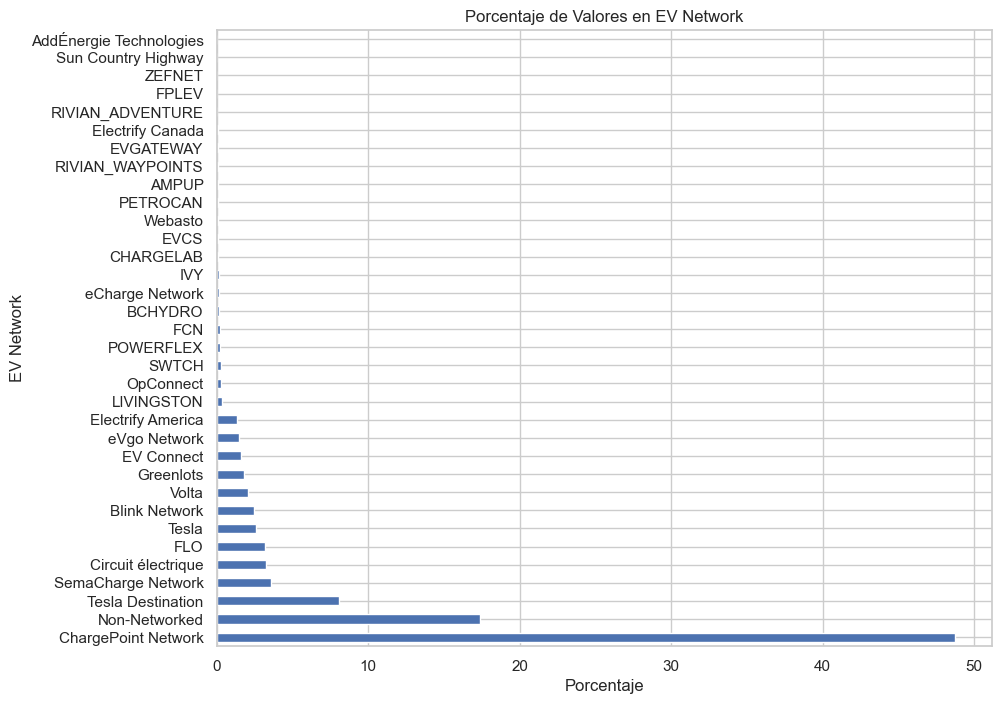

In [208]:
red = 'EV Network'

# Calculamos el porcentaje de cada categoría
red_cuentas = df2[red].value_counts(normalize=True) * 100

# Creamos el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
red_cuentas.plot(kind='barh')
plt.xlabel("Porcentaje")
plt.ylabel(red)
plt.title(f"Porcentaje de Valores en {red}")
plt.show()



En este caso, cerca del 50% de las redes asociadas a un punto de carga son de la plataforma "ChargePoint Network", seguida por un porcentaje mucho menor de todas las demas plataformas.

- **Geocode Status:**

Estado de la geocodificación de la ubicación. La variable "Geocode Status" parece representar diferentes niveles de precisión o tipos de geocodificación para las coordenadas de latitud y longitud de la dirección de la estación. 
Los códigos más bajos generalmente representan geocodificación más específica y precisa, mientras que los códigos más altos pueden representar geocodificación más amplia o menos precisa.
Los valores de código y sus descripciones correspondientes son los siguientes:

- GPS: Indica que las coordenadas de latitud y longitud se obtuvieron directamente del sistema GPS, lo que implica un alto nivel de precisión.
- 200-9: Se refiere a una ubicación de punto específica, lo que indica un nivel de geocodificación preciso.
- 200-8: Representa una geocodificación a nivel de dirección, lo que sugiere que las coordenadas se basan en la dirección de la calle.
- 200-7: Indica que las coordenadas se obtuvieron en la intersección de calles.
- 200-6: Denota una geocodificación a nivel de calle.
- 200-5: Se refiere a varios niveles de geocodificación relacionados con códigos postales, vecindarios o códigos postales extendidos.
- 200-4: Representa una geocodificación a nivel de ciudad o pueblo.
- 200-3: Indica una geocodificación a nivel de condado.
- 200-2: Denota una geocodificación a nivel de estado o provincia.
- 200-1: Representa una geocodificación a nivel de país.
- 200-0: Representa geocodificación desconocida o no especificada.

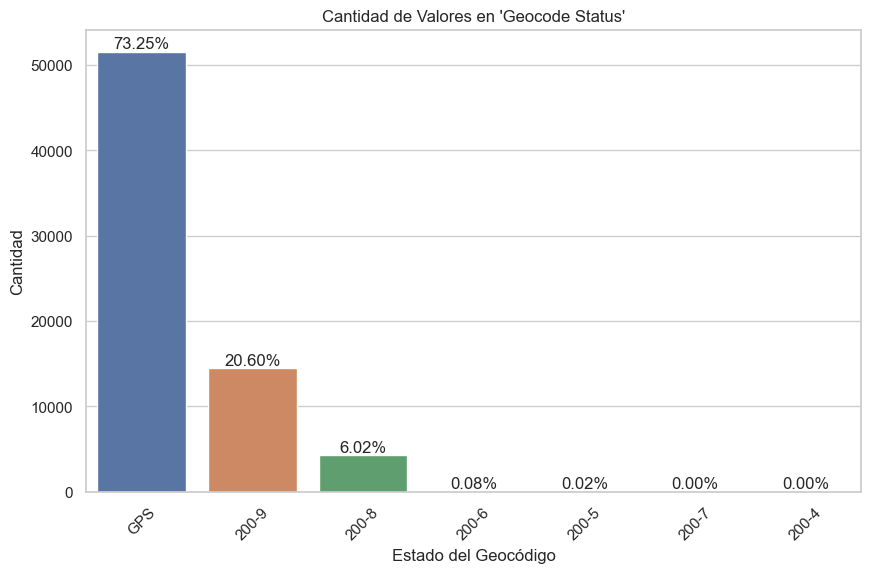

In [221]:
# Calculamos las frecuencias de cada categoría
geocode_status_cuenta = df2['Geocode Status'].value_counts()

# Ordenamos en orden descendente
geocode_status_cuenta = geocode_status_cuenta.sort_values(ascending=False)

# Calculamos el porcentaje de cada categoría
total_samples = len(df2)
geocode_status_percentages = (geocode_status_cuenta / total_samples) * 100

# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=geocode_status_cuenta.index, y=geocode_status_cuenta.values)
plt.xticks(rotation=45)
plt.xlabel("Estado del Geocódigo")
plt.ylabel("Cantidad")
plt.title("Cantidad de Valores en 'Geocode Status'")

# Agregamos los porcentajes sobre las barras
for i, v in enumerate(geocode_status_cuenta.values):
    ax.text(i, v + 5, f"{geocode_status_percentages.iloc[i]:.2f}%", ha='center', va='bottom')

plt.show()



Esto nos indica que la mayoría de los datos de las ubicaciones de los puntos de carga se obtuvieron con GPS para este dataset, lo que brinda un alto nivel de precisión sobre la ubicación de los puntos. 
Pero que no hay datos para aquellos que se obtienen en la intersección de calles (200-7) ni para los que indican la geocodificación a nivel de ciudad o pueblo (200-4).

- **Country:**

Esta variable adopta 2 valores:
- US: Estados Unidos
- CA: Canadá

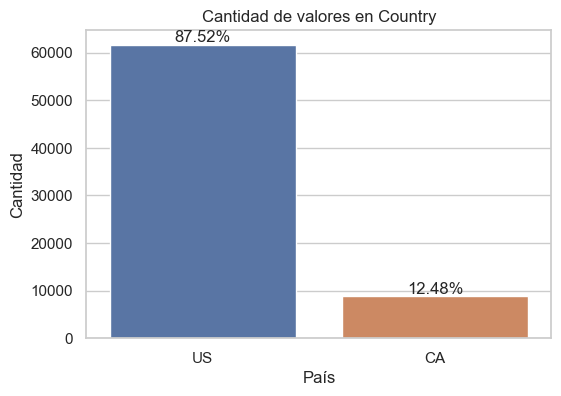

In [228]:
# Calculamos las frecuencias de cada país
cuenta_pais = df2['Country'].value_counts()

# Calculamos el porcentaje de cada categoría
total_samples = len(df2)
porcentajes_pais = (cuenta_pais / total_samples) * 100

# Creamos un gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=cuenta_pais.index, y=cuenta_pais.values)
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.title("Cantidad de valores en Country")

# Agregamos los porcentajes sobre las barras
for i, v in enumerate(cuenta_pais.values):
    ax.text(i, v + 5, f"{porcentajes_pais.iloc[i]:.2f}%", ha='center', va='bottom')

plt.show()


El 87% aproximadamente de los puntos de carga se encuentran registrados en Estados Unidos. 

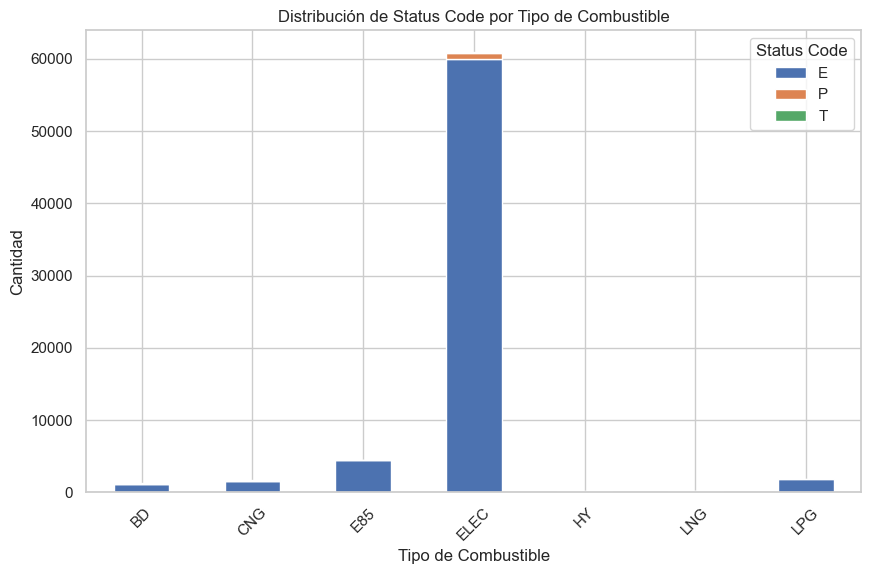

In [229]:
ct = pd.crosstab(df2['Fuel Type Code'], df2['Status Code'])
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.title('Distribución de Status Code por Tipo de Combustible')
plt.legend(title='Status Code')
plt.xticks(rotation=45)
plt.show()


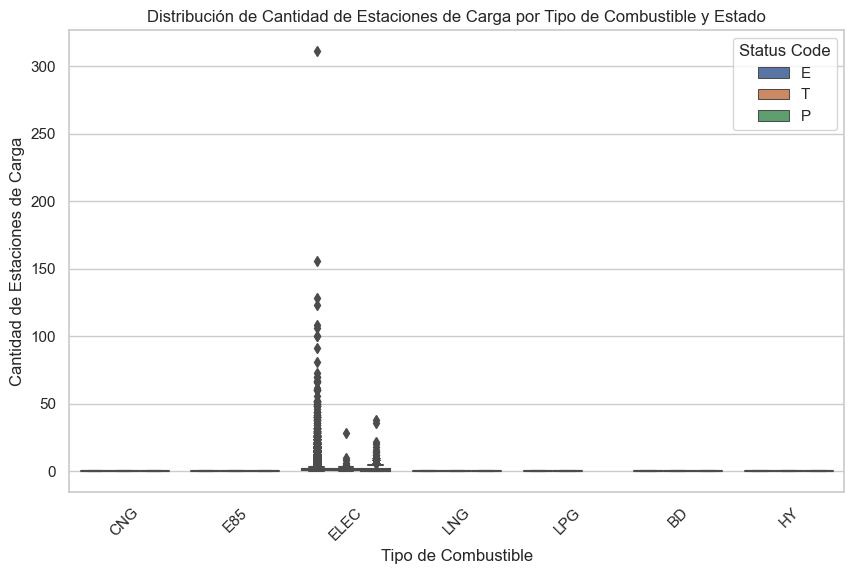

In [237]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Fuel Type Code', y='EV Level2 EVSE Num', hue='Status Code')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad de Estaciones de Carga')
plt.title('Distribución de Cantidad de Estaciones de Carga por Tipo de Combustible y Estado')
plt.xticks(rotation=45)
plt.legend(title='Status Code')
plt.show()


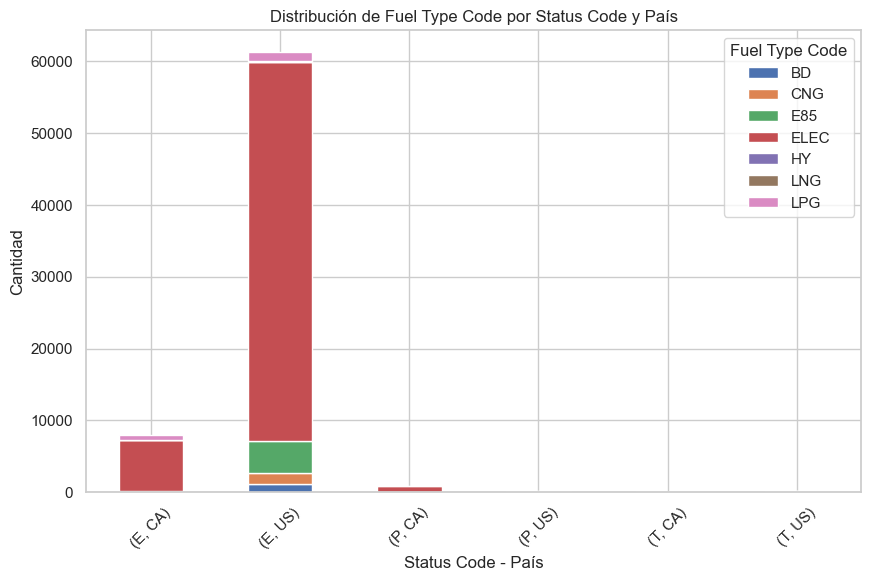

In [239]:
ct = pd.crosstab([df2['Status Code'], df2['Country']], df2['Fuel Type Code'])
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Status Code - País')
plt.ylabel('Cantidad')
plt.title('Distribución de Fuel Type Code por Status Code y País')
plt.legend(title='Fuel Type Code')
plt.xticks(rotation=45)
plt.show()


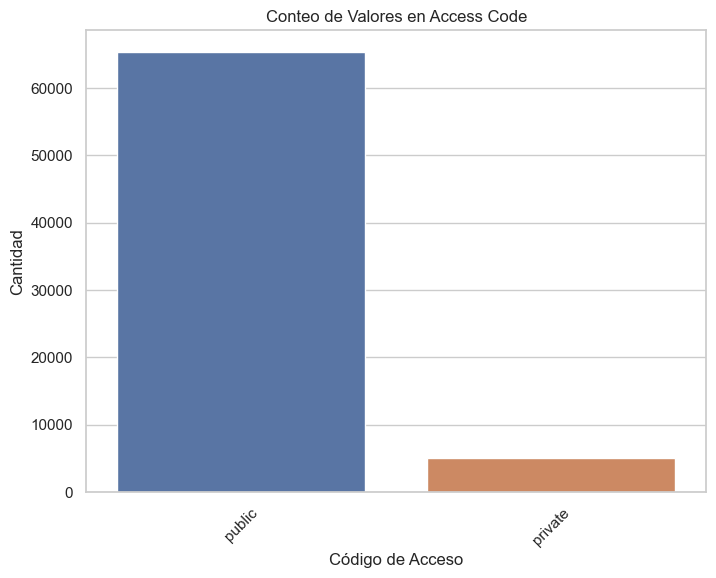

In [223]:
# Calculamos las frecuencias de cada código de acceso
access_code_counts = df2['Access Code'].value_counts()

# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=access_code_counts.index, y=access_code_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Código de Acceso")
plt.ylabel("Cantidad")
plt.title("Conteo de Valores en Access Code")
plt.show()


In [ ]:
# Seleccionamos las columnas a visualizar
tipo_combustible = ['Fuel Type Code', 'Status Code', 'Groups With Access Code',
                       'EV Network', 'Geocode Status', 'Country', 'Access Code']

# Visualizar conteo de valores en columnas categóricas
plt.figure(figsize=(10, 8))
for col in columnas_categoricas:
    sns.countplot(data=df2, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Conteo de Valores en {col}")
    plt.show()

Por supuesto, aquí tienes la traducción:

- E: Disponible
- P: Planeado
- T: Temporalmente no disponible

In [ ]:
#columnas_int = ['ZIP', 'Station Phone', 'EV Level2 EVSE Num', 'ID']
columnas_ = ['EV Level2 EVSE Num']

for column in columnas_:
    valores_unicos = df2[column].unique()
    print(f"Valores únicos en la columna '{column}': {valores_unicos}")

In [116]:
df2.describe()

,EV Level2 EVSE Num,Latitude,Longitude,Date Last Confirmed,ID,Open Date,Year Date Last Confirmed,Month Date Last Confirmed,Year Open Date,Month Open Date
count,70406.000000,70406.000000,70406.000000,70188,70406.000000,69310,70406.000000,70406.000000,70406.000000,70406.000000
mean,1.780516,38.929309,-96.061447,2022-02-26 08:14:09.375962112,148730.326066,2019-01-15 22:20:58.831337472,2015.354856,6.940886,1987.196674,5.500156
min,0.000000,0.000000,-159.788556,2017-05-11 00:00:00,17.000000,1974-11-15 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,34.182981,-117.860563,2021-11-04 00:00:00,113723.250000,2017-12-15 00:00:00,2021.000000,7.000000,2017.000000,2.000000
50%,2.000000,39.105989,-92.002897,2022-07-25 00:00:00,165247.500000,2020-07-10 00:00:00,2022.000000,7.000000,2020.000000,6.000000
75%,2.000000,42.702185,-78.881493,2022-07-25 00:00:00,190653.750000,2021-05-15 00:00:00,2022.000000,7.000000,2021.000000,9.000000
max,311.000000,64.852466,40.432278,2022-07-25 00:00:00,224382.000000,2022-10-15 00:00:00,2022.000000,12.000000,2022.000000,12.000000
std,2.935752,5.628458,19.545273,NaN,54261.672118,NaN,112.320682,2.200399,249.923499,3.699276


In [25]:
# Columnas a convertir a int
int_columns = ['ID', 'Station Phone']
df[int_columns] = df[int_columns].astype(int)

# Columnas a convertir a float
float_columns = ['EV Level2 EVSE Num', 'Latitude', 'Longitude']
df[float_columns] = df[float_columns].astype(float)

# Mostrar los tipos de datos después de la conversión
print(df.dtypes)

Fuel Type Code                       object
Station Name                         object
Street Address                       object
City                                 object
State                                object
ZIP                                  object
Station Phone                        object
Status Code                          object
Groups With Access Code              object
Access Days Time                     object
EV Level2 EVSE Num                  float64
EV Network                           object
EV Network Web                       object
Geocode Status                       object
Latitude                            float64
Longitude                           float64
Date Last Confirmed                  object
ID                                    int32
Updated At                           object
Open Date                            object
EV Connector Types                   object
Country                              object
Groups With Access Code (French)

In [27]:
# Mostrar un resumen estadístico del DataFrame
df.describe()

,EV Level2 EVSE Num,Latitude,Longitude,ID,Year,Month
count,54144.000000,70406.000000,70406.000000,70406.000000,69310.000000,69310.000000
mean,2.315289,38.929309,-96.061447,148730.326066,2018.620242,5.587130
std,3.157387,5.628458,19.545273,54261.672118,4.038681,3.662663
min,1.000000,0.000000,-159.788556,17.000000,1974.000000,1.000000
25%,2.000000,34.182981,-117.860563,113723.250000,2017.000000,2.000000
50%,2.000000,39.105989,-92.002897,165247.500000,2020.000000,6.000000
75%,2.000000,42.702185,-78.881493,190653.750000,2021.000000,9.000000
max,311.000000,64.852466,40.432278,224382.000000,2022.000000,12.000000


In [16]:
# Conteo de valores únicos en la columna "Fuel Type Code"
fuel_type_counts = df['Fuel Type Code'].value_counts()
print(fuel_type_counts)

Fuel Type Code
ELEC    60907
E85      4508
LPG      1867
CNG      1631
BD       1218
LNG       158
HY        117
Name: count, dtype: int64


In [18]:
# Filtrar filas donde el Estado sea "CA" (California)
#ca_stations = df[df['State'] == 'CA']
#print(ca_stations)

# Seleccionar columnas específicas
selected_columns = ['Station Name', 'City', 'State']
selected_data = df[selected_columns]
print(selected_data)


                                       Station Name         City State
0              Spire - Montgomery Operations Center   Montgomery    AL
1                               PS Energy - Atlanta      Atlanta    GA
2      Metropolitan Atlanta Rapid Transit Authority      Atlanta    GA
3                             United Parcel Service      Atlanta    GA
4                        Arkansas Oklahoma Gas Corp   Fort Smith    AR
...                                             ...          ...   ...
70401                     SCHLITZ PARK SCHLITZ PARK    Milwaukee    WI
70402                          NEXUS EAST STATION 2       Austin    TX
70403                                       Raley's       Loomis    CA
70404                           13601 Glenoaks blvd  Los Angeles    CA
70405                            6723 Van Nuys blvd  Los Angeles    CA

[70406 rows x 3 columns]


In [20]:
# Agrupar por Estado y contar la cantidad de estaciones en cada Estado
stations_by_state = df.groupby('State')['Station Name'].count()
print(stations_by_state)

# Calcular el promedio de EV Level2 EVSE Num por Estado
avg_ev_level2_per_state = df.groupby('State')['EV Level2 EVSE Num'].mean()
print(avg_ev_level2_per_state)


State
AB     480
AK      58
AL     409
AR     312
AZ    1104
      ... 
WA    1916
WI     796
WV     156
WY      93
YT      30
Name: Station Name, Length: 65, dtype: int64
State
AB    2.166667
AK    1.617021
AL    2.181132
AR    2.556818
AZ    2.259694
        ...   
WA    2.164627
WI    1.997436
WV    2.315789
WY    1.925926
YT    2.500000
Name: EV Level2 EVSE Num, Length: 65, dtype: float64


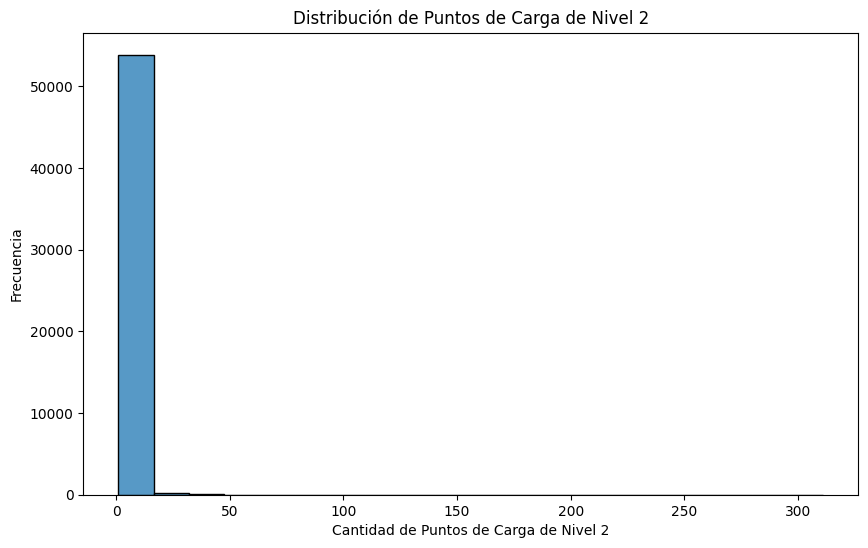

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de puntos de carga de nivel 2
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EV Level2 EVSE Num', bins=20)
plt.xlabel('Cantidad de Puntos de Carga de Nivel 2')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntos de Carga de Nivel 2')
plt.show()


In [19]:
# Conteo de valores faltantes por columna
missing_values = df.isnull().sum()
print(missing_values)


Fuel Type Code                          0
Station Name                            0
Street Address                          1
City                                    0
State                                   0
ZIP                                     1
Station Phone                        5202
Status Code                             0
Groups With Access Code                 0
Access Days Time                     3778
EV Level2 EVSE Num                  16262
EV Network                           9499
EV Network Web                      20101
Geocode Status                         15
Latitude                                0
Longitude                               0
Date Last Confirmed                   218
ID                                      0
Updated At                              0
Open Date                            1096
EV Connector Types                   9716
Country                                 0
Groups With Access Code (French)        0
Access Code                       

In [26]:
# Mostrar un resumen estadístico del DataFrame
df.describe()

,EV Level2 EVSE Num,Latitude,Longitude,ID,Year,Month
count,54144.000000,70406.000000,70406.000000,70406.000000,69310.000000,69310.000000
mean,2.315289,38.929309,-96.061447,148730.326066,2018.620242,5.587130
std,3.157387,5.628458,19.545273,54261.672118,4.038681,3.662663
min,1.000000,0.000000,-159.788556,17.000000,1974.000000,1.000000
25%,2.000000,34.182981,-117.860563,113723.250000,2017.000000,2.000000
50%,2.000000,39.105989,-92.002897,165247.500000,2020.000000,6.000000
75%,2.000000,42.702185,-78.881493,190653.750000,2021.000000,9.000000
max,311.000000,64.852466,40.432278,224382.000000,2022.000000,12.000000


In [23]:
# Convertir la columna 'Open Date' a formato de fecha
df['Open Date'] = pd.to_datetime(df['Open Date'])

# Convertir la columna 'Status Code' a categoría
df['Status Code'] = df['Status Code'].astype('category')


In [24]:
# Extraer el año y el mes de la columna 'Open Date'
df['Year'] = df['Open Date'].dt.year
df['Month'] = df['Open Date'].dt.month

# Conteo de estaciones abiertas por año
stations_per_year = df['Year'].value_counts().sort_index()
print(stations_per_year)


Year
1974.0        1
1978.0        1
1980.0        2
1983.0        1
1984.0        1
1985.0        2
1986.0        1
1987.0       12
1988.0        4
1989.0        5
1990.0        4
1991.0        9
1992.0       11
1993.0       12
1994.0       10
1995.0       25
1996.0       88
1997.0       38
1998.0       38
1999.0      146
2000.0      316
2001.0       49
2002.0       69
2003.0      111
2004.0       65
2005.0      157
2006.0      216
2007.0      262
2008.0      304
2009.0      329
2010.0      305
2011.0     1325
2012.0     1984
2013.0     1148
2014.0     1589
2015.0     2778
2016.0     2944
2017.0     3048
2018.0     3864
2019.0     7026
2020.0    10170
2021.0    22048
2022.0     8792
Name: count, dtype: int64


Bibliografía:

https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/nearby-route/
